# OP-AMP 

<img src="OP_AMP_circuit.png" width ="400" height=400>


### Goal 
Compute the output voltage $v_o$ for a 2V DC excitation.


## LTspice netlist and Python
**(file "OP_AMP_OP.cir")**

```
* OPAMP - SPICE

Vi 1 0 2
Rs 1 in_N 50
Rf in_N out 150
RL out 0 20

* call to the OPAMP model
XOA1 0 in_N out OPAMP

* Circuit analysis
.OP

*saving the data
.PRINT V(1) V(out)

* OPAMP equivalent
.SUBCKT OPAMP P N O
RI P N 2MEG
E1 1 0 P N 200k
Ro 1 O 75
.ENDS OPAMP

.END
```


In [1]:
import os
import ltspice
import matplotlib.pyplot as plt
import numpy as np

#%matplotlib inline

import mpld3
mpld3.enable_notebook()

import warnings
#warnings.filterwarnings("ignore")


#Run the simulation and save in binary .raw
os.system('/Applications/LTspice.app/Contents/MacOS/LTspice -b OP_AMP_OP.cir')

0

In [2]:
#read the raw file generated by LTspice

filepath = 'OP_AMP_OP.raw'


l = ltspice.Ltspice(filepath)
l.parse() # Data loading sequence. It may take few minutes for huge file.

print(l.variables)

['V(1)', 'V(out)']


In [3]:
var = l.variables

Vin= l.getData(var[0])
Vo = l.getData(var[1])

Gain = Vo/Vin


print('Vin= ',Vin)
print('Vo= ',Vo)

print('G= ',Gain)


Vin=  [2.]
Vo=  [-5.99937]
G=  [-2.999685]


/var/folders/55/gzl8n7jn2mv7bl40sxjnb9f80000gn/T/ipykernel_91828/1906007161.py:3: DeprecationWarning: Call to deprecated method getData. (use method which follows pep8) -- Deprecated since version 1.0.0.
  Vin= l.getData(var[0])
/var/folders/55/gzl8n7jn2mv7bl40sxjnb9f80000gn/T/ipykernel_91828/1906007161.py:4: DeprecationWarning: Call to deprecated method getData. (use method which follows pep8) -- Deprecated since version 1.0.0.
  Vo = l.getData(var[1])


## OAMP - Transient analysis

<img src="OP_AMP_circuit.png" width ="400" height=400>


### Goal 
Compute the output voltage $v_o(t)$ for a sinusoidal voltage excitation $v_in(t)=2sin(2\pi 440 t)$

## LTspice netlist and Python
**(file "OP_AMP_OP_TRAN.cir")**

```
* OPAMP TRANSIENT - SPICE

Vi 1 0 1 SIN(0 2 440)
Rs 1 in_N 50
Rf in_N out 150
RL out 0 20

* call to the OPAMP model
XOA1 0 in_N out OPAMP

* Circuit analysis
.TRAN 5m 

*saving the data
.print V(1) V(out)

* OPAMP equivalent
.SUBCKT OPAMP P N O
RI P N 2MEG
E1 1 0 P N 200k
Ro 1 O 75
.ENDS OPAMP

.END
```

['time', 'V(1)', 'V(out)']


/var/folders/55/gzl8n7jn2mv7bl40sxjnb9f80000gn/T/ipykernel_91828/1589282416.py:15: DeprecationWarning: Call to deprecated method getData. (use method which follows pep8) -- Deprecated since version 1.0.0.
  vin= l.getData(var[0])
/var/folders/55/gzl8n7jn2mv7bl40sxjnb9f80000gn/T/ipykernel_91828/1589282416.py:16: DeprecationWarning: Call to deprecated method getData. (use method which follows pep8) -- Deprecated since version 1.0.0.
  vo = l.getData(var[1])


Text(0, 0.5, 'Voltage (V)')

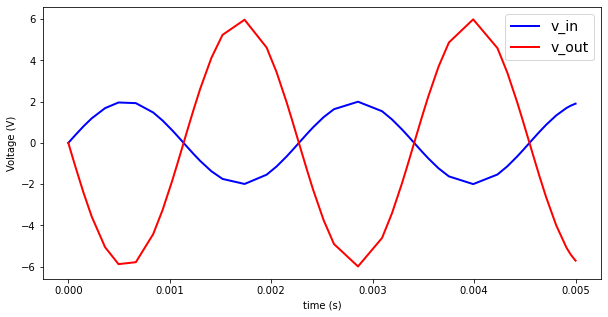

In [4]:
#Run the simulation and save in binary .raw
os.system('/Applications/LTspice.app/Contents/MacOS/LTspice -b OP_AMP_TRAN.cir')


#read the raw file generated by LTspice

filepath = 'OP_AMP_TRAN.raw'


l = ltspice.Ltspice(filepath)
l.parse() # Data loading sequence. It may take few minutes for huge file.

time = l.get_time()

vin= l.getData(var[0])
vo = l.getData(var[1])

print(l.variables)

plt.figure(figsize=(10, 5))

plt.plot(time,vin,color='blue',lw=2,label='v_in')
plt.plot(time,vo,color='red',lw=2,label='v_out')


plt.legend(loc="best",  scatterpoints=1, prop={'size': 14})
plt.xlabel('time (s)')
plt.ylabel('Voltage (V)')
#plt.title('')
#plt.savefig('test_noise_level_v1.pdf')



Text(0, 0.5, 'Voltage (V)')

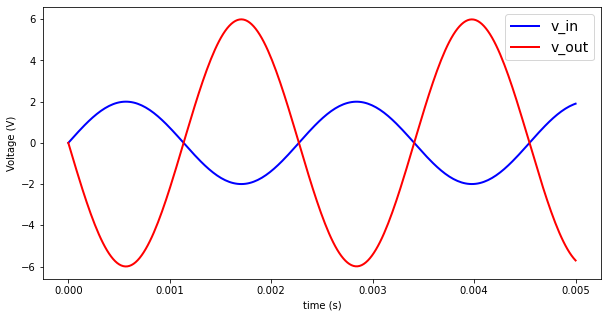

In [5]:
# interpolate the data

from scipy.interpolate import interp1d

time_interp = np.linspace(0,np.max(time),num=250)

vin_interp = interp1d(time, vin, kind='cubic')
vo_interp = interp1d(time, vo, kind='cubic')


plt.figure(figsize=(10, 5))

plt.plot(time_interp,vin_interp(time_interp),color='blue',lw=2,label='v_in')
plt.plot(time_interp,vo_interp(time_interp),color='red',lw=2,label='v_out')


plt.legend(loc="best",  scatterpoints=1, prop={'size': 14})
plt.xlabel('time (s)')
plt.ylabel('Voltage (V)')
#plt.title('')
#plt.savefig('test_noise_level_v1.pdf')